# Logistic Regression for Classifying Success of an Advertisement  using Synthetic Advertising Data set

In this project, a synthetic advertising data set, which is provided in the  course "Python for Data Science and Machine Learning Bootcamp" , is used to indicate whether or not a particular internet user clicked on an Advertisement on a company website.  The features used to create the logistic regression model is defined as follows:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad



# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read and Analyze the Data
* Reading the advertising .csv file and calling it  Data
* Creating a jointplot showing Area Income versus Age
* Creating a jointplot showing the kde distributions of Daily Time spent on site versus Age

In [2]:
Data = pd.read_csv('C:/homa/python/Py-DS-ML-Bootcamp-master/Refactored_Py_DS_ML_Bootcamp-master/13-Logistic-Regression/advertising.csv')

In [3]:
Data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
Data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


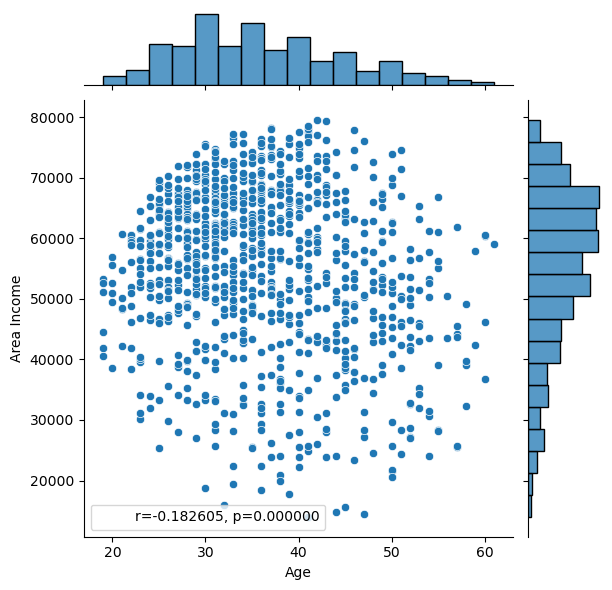

In [6]:
import scipy.stats as stats
graph = sns.jointplot(data=Data, x=Data['Age'], y=Data['Area Income'])
r, p = stats.pearsonr(Data['Age'],Data['Area Income'])
# if you choose to write your own legend, then you should adjust the properties then
phantom, = graph.ax_joint.plot([], [], linestyle="", alpha=0)
# here graph is not a ax but a joint grid, so we access the axis through ax_joint method

graph.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])


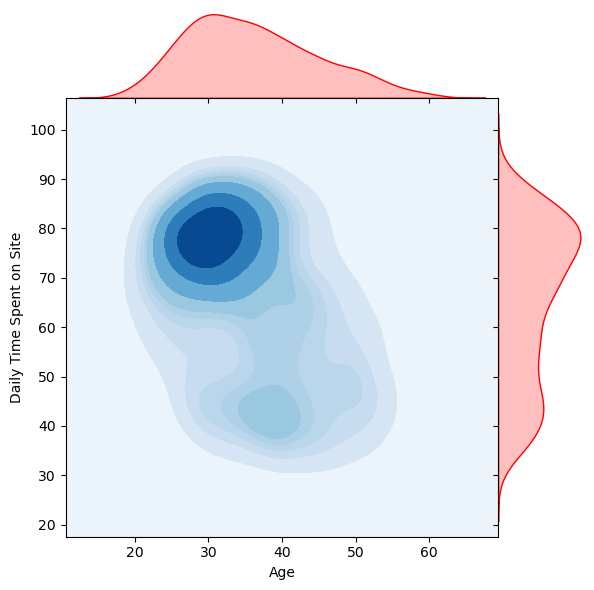

In [7]:
import matplotlib.pyplot as plt 


sns.jointplot(x='Age',y='Daily Time Spent on Site',data=Data,color='red',kind='kde', space=0, fill=True, thresh=0, cmap='Blues');
plt.show() 


# Implementing Logistic Regression Model

* Spliting the data into training set and testing set
* Training and fitting a logistic regression model on the training set
* predicting values for the testing data
*  Creating a classification report for the logestic regression model

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X =Data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = Data['Clicked on Ad']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, test_size=0.33, 
                                                    random_state=42)

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [13]:
predictions = logmodel.predict(X_test)

In [14]:
from sklearn.metrics import classification_report

In [15]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       162
           1       0.96      0.85      0.90       168

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330

